## Siddhardha - CS20B1063

### Question 1
Implement the Perceptron algorithm from scratch in Python.

* Initialize the weights with [0 0 0] and a learning rate of 0.0001.
* For each iteration, calculate the output of the Perceptron for each input in the training set.
* Use MSE to computer the error for all samples
* Update the weights using the gradient descent procedure.
* Repeat the above steps until the Perceptron converges or a maximum number of iterations is reached.
* Test the trained Perceptron on a separate test set.
* Use the step function as an activation function in the output layer

Use the IRIS Dataset for the above, considering all the four features : sepal length, sepal width, petal length, and petal width, but only two classes - Setosa, Versicolor. Drop the feature vectors of the other class. Please find the dataset below.

NOTE - Do not use inbuilt functions for perceptron.

In [38]:
# import the required modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print("Imported the required modules")

Imported the required modules


In [39]:
# import the dataset
df = pd.read_csv("iris.csv")

In [40]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
# get all the unique species
species = df["Species"].unique()
species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [42]:
# consider only iris-setosa and iris-versicolor
df = df[df["Species"] != "Iris-virginica"]

In [43]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

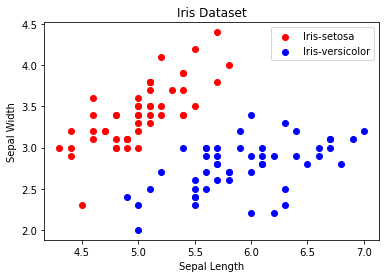

In [44]:
plt.scatter(
    X[y == "Iris-setosa", 0],
    X[y == "Iris-setosa", 1],
    color="red",
    label="Iris-setosa",
)
plt.scatter(
    X[y == "Iris-versicolor", 0],
    X[y == "Iris-versicolor", 1],
    color="blue",
    label="Iris-versicolor",
)
plt.title("Iris Dataset")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

In [45]:
y = np.where(y == "Iris-setosa", 0, 1)

In [46]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [47]:
# training set
X_train = np.concatenate((X[:40], X[50:90]))
y_train = np.concatenate((y[:40], y[50:90]))

In [48]:
# testing set
X_test = np.concatenate((X[40:50], X[90:]))
y_test = np.concatenate((y[40:50], y[90:]))

In [49]:
X_train = np.concatenate((np.ones((len(X_train), 1)), X_train), axis=1)
X_test = np.concatenate((np.ones((len(X_test), 1)), X_test), axis=1)

In [50]:
X_train

array([[1. , 5.1, 3.5, 1.4, 0.2],
       [1. , 4.9, 3. , 1.4, 0.2],
       [1. , 4.7, 3.2, 1.3, 0.2],
       [1. , 4.6, 3.1, 1.5, 0.2],
       [1. , 5. , 3.6, 1.4, 0.2],
       [1. , 5.4, 3.9, 1.7, 0.4],
       [1. , 4.6, 3.4, 1.4, 0.3],
       [1. , 5. , 3.4, 1.5, 0.2],
       [1. , 4.4, 2.9, 1.4, 0.2],
       [1. , 4.9, 3.1, 1.5, 0.1],
       [1. , 5.4, 3.7, 1.5, 0.2],
       [1. , 4.8, 3.4, 1.6, 0.2],
       [1. , 4.8, 3. , 1.4, 0.1],
       [1. , 4.3, 3. , 1.1, 0.1],
       [1. , 5.8, 4. , 1.2, 0.2],
       [1. , 5.7, 4.4, 1.5, 0.4],
       [1. , 5.4, 3.9, 1.3, 0.4],
       [1. , 5.1, 3.5, 1.4, 0.3],
       [1. , 5.7, 3.8, 1.7, 0.3],
       [1. , 5.1, 3.8, 1.5, 0.3],
       [1. , 5.4, 3.4, 1.7, 0.2],
       [1. , 5.1, 3.7, 1.5, 0.4],
       [1. , 4.6, 3.6, 1. , 0.2],
       [1. , 5.1, 3.3, 1.7, 0.5],
       [1. , 4.8, 3.4, 1.9, 0.2],
       [1. , 5. , 3. , 1.6, 0.2],
       [1. , 5. , 3.4, 1.6, 0.4],
       [1. , 5.2, 3.5, 1.5, 0.2],
       [1. , 5.2, 3.4, 1.4, 0.2],
       [1. , 4

In [51]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [52]:
# initialize the weights to zeros
W = np.zeros(X_train.shape[1])

lr = 0.0001

W

array([0., 0., 0., 0., 0.])

In [53]:
# Train the Perceptron until all points are correctly classified and update the weights using the stochastic gradient descent rule

k = 1

while True:
    for i in range(X_train.shape[0]):
        y_pred = np.dot(W, X_train[i])
        error = y_pred - y_train[i]
        if y_pred >= 0.5 and y_train[i] == 0:
            W -= lr * 2 * error * X_train[i]
        elif y_pred < 0.5 and y_train[i] == 1:
            W -= lr * 2 * error * X_train[i]

    count = 0
    for i in range(X_train.shape[0]):
        if (
            np.dot(W.T, X_train[i]) >= 0.5
            and y_train[i] == 1
            or np.dot(W.T, X_train[i]) < 0.5
            and y_train[i] == 0
        ):
            count += 1
    print("{} points correctly classified in {} iteration".format(count, k))

    if count == X_train.shape[0]:
        break
    k += 1

40 points correctly classified in 1 iteration
73 points correctly classified in 2 iteration
78 points correctly classified in 3 iteration
78 points correctly classified in 4 iteration
78 points correctly classified in 5 iteration
77 points correctly classified in 6 iteration
77 points correctly classified in 7 iteration
76 points correctly classified in 8 iteration
77 points correctly classified in 9 iteration
77 points correctly classified in 10 iteration
77 points correctly classified in 11 iteration
77 points correctly classified in 12 iteration
77 points correctly classified in 13 iteration
77 points correctly classified in 14 iteration
78 points correctly classified in 15 iteration
78 points correctly classified in 16 iteration
78 points correctly classified in 17 iteration
78 points correctly classified in 18 iteration
78 points correctly classified in 19 iteration
78 points correctly classified in 20 iteration
78 points correctly classified in 21 iteration
79 points correctly cl

In [54]:
W

array([0.01000609, 0.05605362, 0.02169931, 0.04587027, 0.01433344])

In [55]:
# get the accurracy in the testing set
count = 0
for i in range(X_test.shape[0]):
    if (
        np.dot(W.T, X_test[i]) >= 0.5
        and y_test[i] == 1
        or np.dot(W.T, X_test[i]) < 0.5
        and y_test[i] == 0
    ):
        count += 1

print("Accuracy: {}%".format(count / X_test.shape[0] * 100))

Accuracy: 100.0%
